# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.

btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income

monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19081981,
            "id": 1,
            "last_updated": 1656652467,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 370488126289,
                    "percent_change_1h": -0.925726911043929,
                    "percent_change_24h": -3.12298224028912,
                    "percent_change_7d": -8.05943467601418,
                    "percentage_change_1h": -0.925726911043929,
                    "percentage_change_24h": -3.12298224028912,
                    "percentage_change_7d": -8.05943467601418,
                    "price": 19399.71,
                    "volume_24h": 28004982665
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19081981,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [7]:
# Using the Python requests library, make an API call to access the current price ETH

eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119506127,
            "id": 1027,
            "last_updated": 1656652467,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 125396230713,
                    "percent_change_1h": -0.0353644210797113,
                    "percent_change_24h": -3.46520382595405,
                    "percent_change_7d": -8.19503858946138,
                    "percentage_change_1h": -0.0353644210797113,
                    "percentage_change_24h": -3.46520382595405,
                    "percentage_change_7d": -8.19503858946138,
                    "price": 1050.69,
                    "volume_24h": 18861274732
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119506127,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC

btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC

print(f"BTC Price is: {btc_price}")


BTC Price is: 19399.71


In [9]:
# Navigate the ETH response object to access the current price of ETH

eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH

print(f"ETH Price is: {eth_price}")


ETH Price is: 1050.69


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 

btc_value = btc_coins * btc_price

# Print current value of your holding in BTC

print(f"Current value of BTC holdings: {btc_value}")


Current value of BTC holdings: 23279.652


In [11]:
# Compute the current value of the ETH holding 

eth_value = eth_coins * eth_price

# Print current value of your holding in ETH

print(f"Current value of ETH holdings: {eth_price}")


Current value of ETH holdings: 1050.69


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance

print(f"Crypto wallet balance: {total_crypto_wallet:.2f}")


Crypto wallet balance: 28848.31


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.

spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
                           
# Create the Alpaca tradeapi.REST object

alpaca_rest_obj = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ['SPY', 'AGG']

# Set timeframe to 1Day

timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07


start_date = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()
end_date   = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()

print(start_date)
print(end_date)


2022-06-24T00:00:00-04:00
2022-06-24T00:00:00-04:00


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

df_portfolio = alpaca_rest_obj.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

df_portfolio = pd.concat([SPY, AGG], axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame

df_portfolio.head(5)


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-06-24 04:00:00+00:00  381.43  390.09  381.365  390.08  97628636   

                                                     AGG                   \
                          trade_count       vwap    open    high      low   
timestamp                                                                   
2022-06-24 04:00:00+00:00      628275  386.72431  101.11  101.47  100.995   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-24 04:00:00+00:00  101.05  7379452       22965  101.093993

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(df_portfolio['AGG']['close'].iloc[0])

# Print the AGG closing price

print(f"AGG Closing Price: {agg_close_price:.2f}")


AGG Closing Price: 101.05


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number

spy_close_price = float(df_portfolio['SPY']['close'].iloc[0])

# Print the SPY closing price

print(f"SPY Closing Price: {spy_close_price:.2f}")


SPY Closing Price: 390.08


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio

agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio

print(f"AGG current value: {agg_value:.2f}")


AGG current value: 20210.00


In [20]:
# Calculate the current value of the stock portion of the portfolio

spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio

print(f"SPY current value: {spy_value:.2f}")


SPY current value: 42908.80


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio

total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio

print(f"Current stock & bond portfolio balance: {total_stocks_bonds:.2f}")


Current stock & bond portfolio balance: 63118.80


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance

print(f"Total savings portfolio balance: {total_stocks_bonds:.2f}")


Total savings portfolio balance: 63118.80


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list

savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data

savings_data
    

[28848.308999999997, 63118.799999999996]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(
    savings_data,
    columns=['amount'],
    index=['crypto', 'stock/bond']
)

# Display the savings_df DataFrame

savings_df


,amount
crypto,28848.309
stock/bond,63118.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

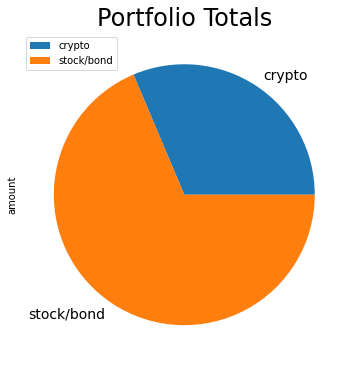

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

savings_ax = savings_df.plot(
    kind='pie',
    y='amount',
    title='Portfolio Totals',
    figsize=(10,6),
    rot=0,
    fontsize=14,
    grid=True
)
savings_ax.title.set_size(24)


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value

emergency_fund_value = 3 * monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if total_portfolio > emergency_fund_value:
    print("Congratulations, you have enough money for an emergency fund!")
    
elif total_portfolio == emergency_fund_value:
    print("Congratulations, you reached your goal of saving for an emergecy fund!")
    
else:
    distance_from_goal = emergency_fund_value - total_portfolio
    print(f"You are this far from eaching your emergency fund goal: {distance_from_goal:.2f}!")


Congratulations, you have enough money for an emergency fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

# three_years = 365 * 3
# monte_carlo_start_date = (datetime.now() - timedelta(days=three_years)).isoformat()
# monte_carlo_end_date   = datetime.now().isoformat()

monte_carlo_start_date = pd.Timestamp("2019-06-24", tz="America/New_York").isoformat()
monte_carlo_end_date   = pd.Timestamp("2022-06-24", tz="America/New_York").isoformat()

print(monte_carlo_start_date)
print(monte_carlo_end_date)


2019-06-24T00:00:00-04:00
2022-06-24T00:00:00-04:00


In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

monte_carlo_df = alpaca_rest_obj.get_bars(
    tickers,
    timeframe,
    start = monte_carlo_start_date,
    end = monte_carlo_end_date
).df

monte_carlo_df

# Reorganize the DataFrame
# Separate ticker data

mc_SPY = monte_carlo_df[monte_carlo_df['symbol']=='SPY'].drop('symbol', axis=1)
mc_AGG = monte_carlo_df[monte_carlo_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

monte_carlo_df = pd.concat([mc_SPY, mc_AGG], axis=1, keys=['SPY','AGG'])
# monte_carlo_df.index = monte_carlo_df.index.date

# Display both the first and last five rows of the DataFrame

display(monte_carlo_df.head())
display(monte_carlo_df.tail())


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2019-06-24 04:00:00+00:00  294.18  294.58  293.470  293.64  47610730   
2019-06-25 04:00:00+00:00  293.67  293.73  290.640  290.76  82344336   
2019-06-26 04:00:00+00:00  291.78  292.31  290.345  290.47  52064906   
2019-06-27 04:00:00+00:00  291.29  292.06  290.890  291.50  40484164   
2019-06-28 04:00:00+00:00  292.57  293.55  292.010  293.00  59508955   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-06-24 04:00:00+00:00      203286  293.971447  111.23  111.3766  111.2200   
2019-06-25 04:00:00+00:00      301447  292.000459  111.36  111.4400  111.2200   
2019-06-26 04:00:00+00:00      226135  291.035618  111.29  111.3100  111.0600   
2019-06-27 04:00:00+00:00      185583  291.584832  111.25  111.4100  111.1633   
2019-06-28 04:00:00+00:00      246484  292.797839  111.36  111.4684  111.3200   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-06-24 04:00:00+00:00  111.32  3079794       16767  111.300802  
2019-06-25 04:00:00+00:00  111.34  3111092       14344  111.364505  
2019-06-26 04:00:00+00:00  111.09  3703224       13654  111.151757  
2019-06-27 04:00:00+00:00  111.40  2963646       14735  111.338162  
2019-06-28 04:00:00+00:00  111.35  9887791       19668  111.395360

SPY                                       \
                             open     high      low   close     volume   
timestamp                                                                
2022-06-17 04:00:00+00:00  365.43  369.380  362.170  365.86  109255759   
2022-06-21 04:00:00+00:00  371.90  376.525  371.810  375.07   76966205   
2022-06-22 04:00:00+00:00  370.68  378.720  370.180  374.39   89625876   
2022-06-23 04:00:00+00:00  376.69  378.830  372.890  378.06   78643521   
2022-06-24 04:00:00+00:00  381.43  390.090  381.365  390.08   97628636   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-06-17 04:00:00+00:00      821350  366.263193  100.42  100.5700   99.980   
2022-06-21 04:00:00+00:00      578265  374.376305  100.02  100.2600   99.790   
2022-06-22 04:00:00+00:00      604343  375.146941  100.67  100.9296  100.665   
2022-06-23 04:00:00+00:00      623105  376.219755  101.25  101.7600  101.125   
2022-06-24 04:00:00+00:00      628275  386.724310  101.11  101.4700  100.995   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-06-17 04:00:00+00:00  100.34  9891839       26374  100.372650  
2022-06-21 04:00:00+00:00   99.94  7769462       24356   99.992280  
2022-06-22 04:00:00+00:00  100.79  9430887       30103  100.802688  
2022-06-23 04:00:00+00:00  101.21  7760715       25697  101.363615  
2022-06-24 04:00:00+00:00  101.05  7379452       22965  101.093993

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30 = MCSimulation(
    portfolio_data = monte_carlo_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data

mc_sim_30.portfolio_data.head()


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2019-06-24 04:00:00+00:00  294.18  294.58  293.470  293.64  47610730   
2019-06-25 04:00:00+00:00  293.67  293.73  290.640  290.76  82344336   
2019-06-26 04:00:00+00:00  291.78  292.31  290.345  290.47  52064906   
2019-06-27 04:00:00+00:00  291.29  292.06  290.890  291.50  40484164   
2019-06-28 04:00:00+00:00  292.57  293.55  292.010  293.00  59508955   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-24 04:00:00+00:00      203286  293.971447          NaN  111.23   
2019-06-25 04:00:00+00:00      301447  292.000459    -0.009808  111.36   
2019-06-26 04:00:00+00:00      226135  291.035618    -0.000997  111.29   
2019-06-27 04:00:00+00:00      185583  291.584832     0.003546  111.25   
2019-06-28 04:00:00+00:00      246484  292.797839     0.005146  111.36   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2019-06-24 04:00:00+00:00  111.3766  111.2200  111.32  3079794       16767   
2019-06-25 04:00:00+00:00  111.4400  111.2200  111.34  3111092       14344   
2019-06-26 04:00:00+00:00  111.3100  111.0600  111.09  3703224       13654   
2019-06-27 04:00:00+00:00  111.4100  111.1633  111.40  2963646       14735   
2019-06-28 04:00:00+00:00  111.4684  111.3200  111.35  9887791       19668   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-24 04:00:00+00:00  111.300802          NaN  
2019-06-25 04:00:00+00:00  111.364505     0.000180  
2019-06-26 04:00:00+00:00  111.151757    -0.002245  
2019-06-27 04:00:00+00:00  111.338162     0.002791  
2019-06-28 04:00:00+00:00  111.395360    -0.000449

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

mc_sim_30.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Volumes/GoogleDrive/My Drive/Projects/uw-fintech-2022/Module-05/Challenge/code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981523,1.002194,1.014902,1.001268,0.993651,0.996478,1.017028,1.005062,1.012475,0.993867,...,1.006777,0.989131,1.001242,0.998224,0.998214,0.989657,0.996676,0.990688,1.007184,1.007736
2,0.986774,1.008268,1.030898,1.000476,0.985305,1.014449,1.014331,0.998787,1.021986,0.995054,...,1.009304,0.987066,0.990454,0.989922,0.995035,0.993693,0.992393,0.986562,1.005265,1.008329
3,0.987413,1.015920,1.019836,1.005584,0.989935,1.030500,1.016052,1.007186,1.022320,0.990854,...,1.011335,0.989809,0.985848,0.973265,0.989605,0.990027,0.982426,0.984432,1.006034,0.992266
4,0.966230,1.018338,1.008115,1.006317,0.988250,1.018625,1.002730,1.023779,1.010124,0.981325,...,1.027411,1.007254,0.989006,0.967111,0.985466,0.986507,0.981532,1.004007,1.004833,1.008477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.074542,3.256476,13.681153,5.619353,1.069592,16.479985,5.361246,18.201465,3.355514,2.343290,...,4.536345,7.838173,12.585550,2.802252,6.419758,21.368801,1.408519,3.058613,1.375327,1.924585
7557,22.140388,3.223265,13.553415,5.572582,1.066303,16.112126,5.387084,18.210445,3.347101,2.341172,...,4.520225,7.850039,12.510976,2.868797,6.401344,21.250344,1.391221,3.068412,1.358752,1.944884
7558,22.202292,3.208403,13.519132,5.612352,1.065224,16.318680,5.485093,18.256974,3.373609,2.335386,...,4.567725,7.827365,12.684972,2.867518,6.224171,21.401578,1.372349,3.060238,1.348369,1.931310
7559,21.909373,3.170831,13.407582,5.632328,1.063565,16.372224,5.500506,18.135159,3.387255,2.288922,...,4.691139,7.816414,12.701981,2.843478,6.203645,21.628965,1.350967,3.040805,1.345345,1.922990


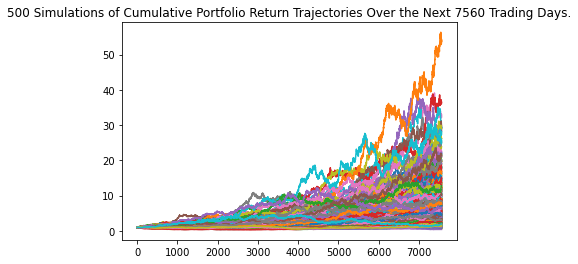

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

# Plot simulation outcomes
mc_sim_30_line_plot = mc_sim_30.plot_simulation()

# Save the plot for future use
mc_sim_30_line_plot.get_figure().savefig("mc_30-year_sim_plot.png", bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

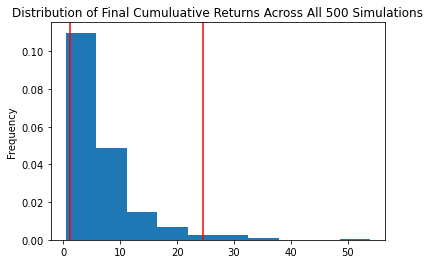

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

# Plot probability distribution and confidence intervals
mc_sim_30_dist_plot = mc_sim_30.plot_distribution()

# Save the plot for future use
mc_sim_30_dist_plot.get_figure().savefig('mc_30-year-dist_plot.png',bbox_inches='tight')


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

# Set the summary statistics equal to a variable for future use
mc_sim_30_summary_stats = mc_sim_30.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics

# Print summary statistics Series
print(mc_sim_30_summary_stats)


count           500.000000
mean              6.580793
std               6.064884
min               0.419148
25%               2.693841
50%               4.844702
75%               7.973786
max              53.918343
95% CI Lower      1.072348
95% CI Upper     24.552380
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio

print(f"Current balance of the portfolio's stocks/bonds: {total_stocks_bonds:.2f}")


Current balance of the portfolio's stocks/bonds: 63118.80


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio

ci_lower_thirty_cumulative_return = total_stocks_bonds * mc_sim_30_summary_stats[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds * mc_sim_30_summary_stats[9]

# Print the result of your calculations

print(f"\nThere is a 95% chance that a stock and bond portfolio with an initial amount of "
    f"${total_stocks_bonds:.2f} will end in the range of ${ci_lower_thirty_cumulative_return:.2f}"
    f" and ${ci_upper_thirty_cumulative_return:.2f} after 30 years.\n")



There is a 95% chance that a stock and bond portfolio with an initial amount of $63118.80 will end in the range of $67685.35 and $1549716.75 after 30 years.



### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_10 = MCSimulation(
    portfolio_data = monte_carlo_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data

mc_sim_10.portfolio_data.head()


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2019-06-24 04:00:00+00:00  294.18  294.58  293.470  293.64  47610730   
2019-06-25 04:00:00+00:00  293.67  293.73  290.640  290.76  82344336   
2019-06-26 04:00:00+00:00  291.78  292.31  290.345  290.47  52064906   
2019-06-27 04:00:00+00:00  291.29  292.06  290.890  291.50  40484164   
2019-06-28 04:00:00+00:00  292.57  293.55  292.010  293.00  59508955   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-06-24 04:00:00+00:00      203286  293.971447          NaN  111.23   
2019-06-25 04:00:00+00:00      301447  292.000459    -0.009808  111.36   
2019-06-26 04:00:00+00:00      226135  291.035618    -0.000997  111.29   
2019-06-27 04:00:00+00:00      185583  291.584832     0.003546  111.25   
2019-06-28 04:00:00+00:00      246484  292.797839     0.005146  111.36   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2019-06-24 04:00:00+00:00  111.3766  111.2200  111.32  3079794       16767   
2019-06-25 04:00:00+00:00  111.4400  111.2200  111.34  3111092       14344   
2019-06-26 04:00:00+00:00  111.3100  111.0600  111.09  3703224       13654   
2019-06-27 04:00:00+00:00  111.4100  111.1633  111.40  2963646       14735   
2019-06-28 04:00:00+00:00  111.4684  111.3200  111.35  9887791       19668   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-06-24 04:00:00+00:00  111.300802          NaN  
2019-06-25 04:00:00+00:00  111.364505     0.000180  
2019-06-26 04:00:00+00:00  111.151757    -0.002245  
2019-06-27 04:00:00+00:00  111.338162     0.002791  
2019-06-28 04:00:00+00:00  111.395360    -0.000449

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

mc_sim_10.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Volumes/GoogleDrive/My Drive/Projects/uw-fintech-2022/Module-05/Challenge/code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981531,0.993100,1.012500,0.997990,1.000480,0.986391,1.012657,0.987082,0.996727,0.998416,...,0.989394,0.991176,0.978422,1.008896,0.991110,0.981726,0.990555,0.997819,1.015079,0.997318
2,0.985127,1.003061,1.022315,1.012881,1.005866,0.979222,1.047550,0.990783,0.989158,0.998771,...,1.002026,1.014290,0.969208,1.023409,1.006610,0.993680,0.996825,0.988355,1.011993,1.007965
3,0.974351,1.005581,1.026224,1.029019,0.983562,0.955554,1.042122,0.959076,1.004128,1.004565,...,1.009421,1.015269,0.961211,1.024129,1.021422,0.990217,1.012667,0.981201,1.027799,1.016767
4,0.967938,0.989141,1.030574,1.029924,0.986385,0.962502,1.017357,0.948683,0.998064,1.012461,...,1.015379,1.045429,0.950688,1.025972,1.015981,1.008900,1.010646,0.965153,1.022374,1.027066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.144484,1.438305,4.675914,1.457484,1.406605,1.079369,7.400428,2.688274,3.637783,1.726144,...,6.508985,1.651669,3.275377,2.869687,5.886354,1.362904,2.701700,2.217904,1.978483,2.026449
2517,2.109643,1.425618,4.586991,1.461552,1.431346,1.087560,7.355422,2.742100,3.603063,1.721454,...,6.528895,1.664564,3.228129,2.804097,5.875872,1.374278,2.669509,2.191564,1.998240,1.983198
2518,2.106936,1.434495,4.597663,1.431817,1.429180,1.106140,7.504621,2.725125,3.622014,1.714096,...,6.630562,1.644345,3.265422,2.839113,5.805111,1.352650,2.681214,2.208879,2.003083,1.995883
2519,2.136695,1.428446,4.493308,1.429567,1.388658,1.114124,7.614856,2.709156,3.595293,1.732145,...,6.548165,1.614311,3.287389,2.854624,5.780264,1.370381,2.689801,2.200404,2.007280,1.972318


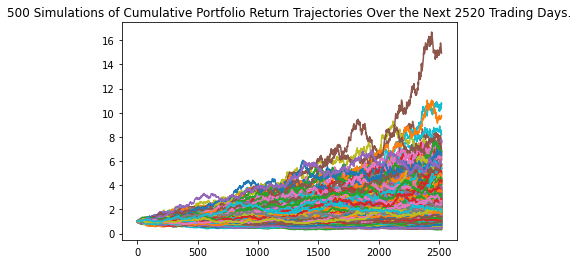

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

# Plot simulation outcomes
mc_sim_10_line_plot = mc_sim_10.plot_simulation()

# Save the plot for future use
mc_sim_10_line_plot.get_figure().savefig("mc_10-year_sim_plot.png", bbox_inches="tight")


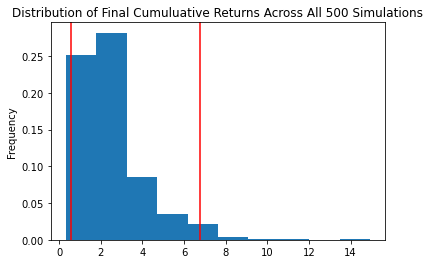

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

# Plot probability distribution and confidence intervals
mc_sim_10_dist_plot = mc_sim_10.plot_distribution()

# Save the plot for future use
mc_sim_10_dist_plot.get_figure().savefig('mc_10-year-dist_plot.png',bbox_inches='tight')


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

# Set the summary statistics equal to a variable for future use
mc_sim_10_summary_stats = mc_sim_10.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics

# Print summary statistics Series
print(mc_sim_10_summary_stats)


count           500.000000
mean              2.553987
std               1.659864
min               0.318096
25%               1.394188
50%               2.208588
75%               3.113869
max              14.940862
95% CI Lower      0.549277
95% CI Upper      6.759417
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio

print(f"Current balance of the portfolio's stocks/bonds: {total_stocks_bonds:.2f}")


Current balance of the portfolio's stocks/bonds: 63118.80


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio


ci_lower_ten_cumulative_return = total_stocks_bonds * mc_sim_10_summary_stats[8]
ci_upper_ten_cumulative_return = total_stocks_bonds * mc_sim_10_summary_stats[9]

# Print the result of your calculations

print(f"\nThere is a 95% chance that a stock and bond portfolio with an initial amount of "
    f"${total_stocks_bonds:.2f} will end in the range of ${ci_lower_ten_cumulative_return:.2f}"
    f" and ${ci_upper_ten_cumulative_return:.2f} after 10 years.\n")



There is a 95% chance that a stock and bond portfolio with an initial amount of $63118.80 will end in the range of $34669.72 and $426646.28 after 10 years.



#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer**

- *No, members will not be able to retire after 10 years. With a stock weighting of 80% their portfolios are much riskier and have a larger possibility of losing value over that time frame.*
- *In addition, there's just not enough time for compound interest to increase someone's investment! After 10 years the amount someone could have might be ~400k whereas after 30 years the amount they could have might be ~1.5M!!!*